# Aprendizagem - Homework IV
### II. Programming - Grupo99
(ist1106059, ist1106329)

In [66]:
import pandas as pd

df = pd.read_csv('accounts.csv')
target = df['deposit']
df_selected = df.iloc[:, :8].drop_duplicates().dropna()
df = pd.get_dummies(df_selected, drop_first=True)

print(df)

       age  balance  job_blue-collar  job_entrepreneur  job_housemaid  \
0       59     2343                0                 0              0   
1       56       45                0                 0              0   
2       41     1270                0                 0              0   
3       55     2476                0                 0              0   
4       54      184                0                 0              0   
...    ...      ...              ...               ...            ...   
11156   34      -72                1                 0              0   
11157   33        1                1                 0              0   
11158   39      733                0                 0              0   
11159   32       29                0                 0              0   
11160   43        0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  

1:

a)

17617.000494708685
16045.499796834467
13848.350818936648
12983.509778971174
11733.378745824628
11335.704234712923
10524.882858249746


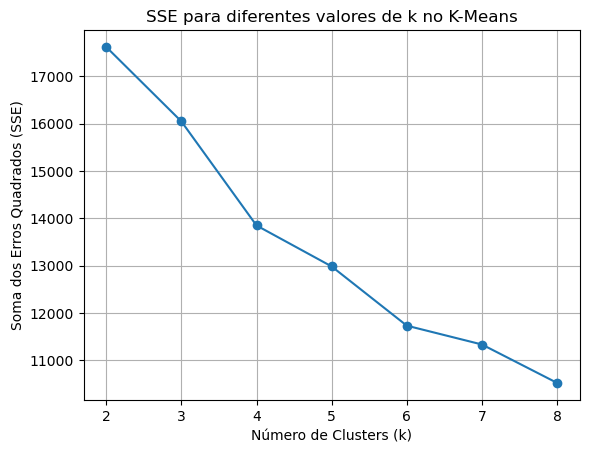

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_minmax = MinMaxScaler().fit_transform(df)

k_values = range(2, 9)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_minmax)
    sse.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.title('SSE para diferentes valores de k no K-Means')
plt.grid(True)
plt.show()

b) 

Para responder à questão, podemos observar o gráfico obtido tendo em conta o conceito de "elbow finding".

Este conceito ajuda-nos a identificar o número ideal de clusters (k) de forma a haver uma boa divisão de dados sem criar clusters desnecessários.
Isto porque não basta olhar para o valor da SSE. Obviamente, quanto mais clusters tivermos, menor será o erro obtido porque os clusters vão dividir cada vez mais os dados e ajustar-se cada vez mais aos mesmos. No entanto, a partir de certo ponto, este aumento no número de clusters deixa de ser útil porque começamos a dividir dados com características similares e que deveriam pertencer ao mesmo cluster, o que dificulta a interpretação dos resultados, deixamos de conseguir captar padrões e de generalizar, e a aumentamos a complexidade do modelo.

Logo, é necessário encontar um equilíbrio entre diminuir a inercia e obter um valor de k que evite as desvantagens mencionadas. Para isso, procuramos no gráfico o "elbow", ou seja, o ponto em que a redução da SSE fica menos acentuada e por isso, não há um ganho tão significativo com a redução do SSE como nos valores de k iniciais.

No plot obtido, a taxa de diminuição da SSE não varia muito, e por isso, este "elbow" não é muito óbvio. No entanto, é possível identificar que o valor ideal do número de clusters é k = 4 já que, de k=2 a k=4 a redução da SSE é mais acentuada que de valores de k superiores a 4 (em que a redução da SSE fica mais constante).

c) 

O k-modes é uma adaptação do k-mean para variáveis categóricas. Utiliza a distância de Hamming (contagem de valores diferentes entre observações) em vez da distância Euclidiana para calcular a distância entre as observações e os centróides dos clusters. No entanto, tal como o k-mean não apresenta resultados ótimos para variáveis categóricas, que não têm nenhuma relação de proximidade numérica, o k-modes não é ideal para variáveis numéricas porque iria apresentar o mesmo valor para duas observações com atributos númericos quer muito próximos, quer muito distantes (desde que sejam diferentes).

No que toca ao dataset em questão, temos tanto variáveis numéricas (como age e balance) como variáveis categóricas (como job, marital, education...). No entanto, como este contém mais variáveis categóricas que numéricas, o k-modes poderia ser uma melhor abordagem e poderia gerar clusters mais representativos. É de notar que esta escolha teria sempre prós e contras e, para além da proporção existente de cada tipo de variável, também é preciso ter em conta o significado e relevância de cada uma em relação aos resultados pretendidos.

Existe ainda outro aspeto que é importante mencionar. Neste dataset, foi aplicado uma normalização e conversão das variáveis categóricas para valores binários (com o get_dummies()), de forma a que o k-means processe variáveis categóricas como se fossem numéricas, melhorando assim os resultados obtidos. No entanto, esta abordagem aumenta consideravelmente a dimensionalidade do dataset e consequentemente, a complexidade do modelo e dificuldade na interpretação dos resultados, podendo fazer com que o k-modes ainda fosse uma abordagem melhor.

2:

a)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df)

pca = PCA(n_components=2).fit(df_scaled)
explained_variance = pca.explained_variance_ratio_.sum()

print(f"Variability explained by the top 2 components: {explained_variance * 100:.2f}%")

Variability explained by the top 2 components: 22.76%


b)

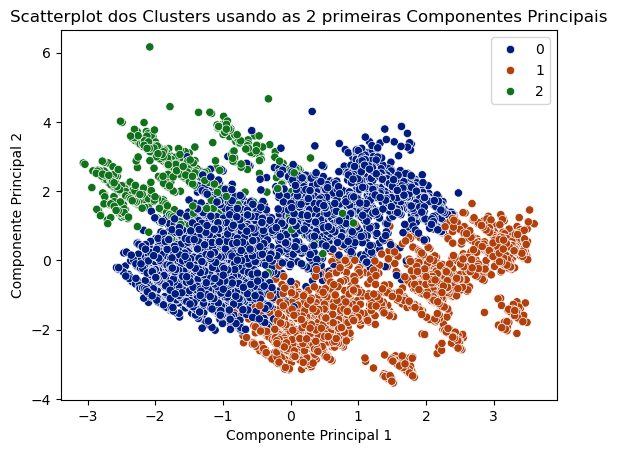

In [97]:
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)
clusters = kmeans.fit_predict(df_scaled)

df_pca = pca.transform(df_scaled)

sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette="dark")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatterplot dos Clusters usando as 2 primeiras Componentes Principais')
plt.legend()
plt.show()

Ao observar o scatterplot, é possível distinguir 3 grupos distintos e, ainda que haja alguns pontos sobrepostos, não parece ser em quantidade significativa que impeça de formar estes 3 grupos. Logo, podemos afirmar que conseguimos separar os clusters tendo em conta as 2 componentes principais.

c)

<Figure size 1600x1000 with 0 Axes>

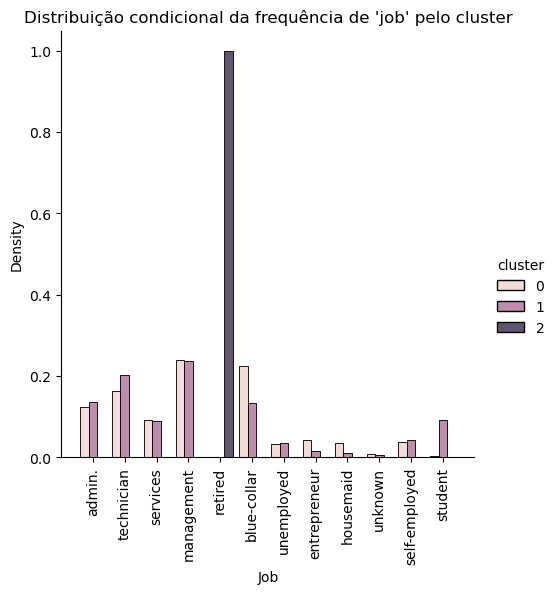

<Figure size 1600x1000 with 0 Axes>

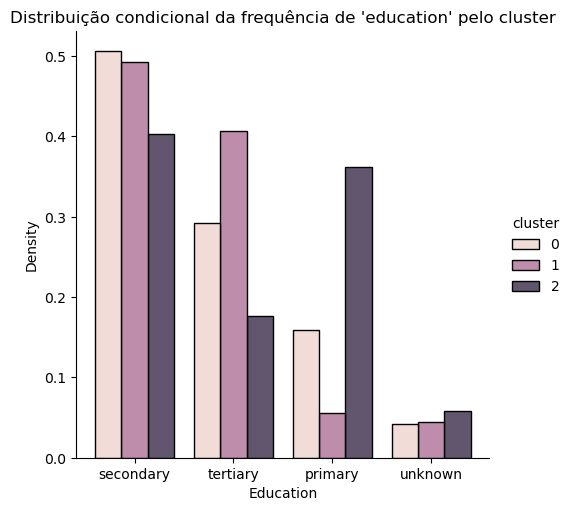

In [83]:
df_selected['cluster'] = clusters

plt.figure(figsize=(16, 10))

sns.displot(df_selected, x="job", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.title("Distribuição condicional da frequência de 'job' pelo cluster")

plt.show()


plt.figure(figsize=(16, 10))

sns.displot(df_selected, x="education", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.xlabel('Education')
plt.title("Distribuição condicional da frequência de 'education' pelo cluster")

plt.show()

Ao analisar os gráficos da distribuição condicional das variáveis "job" e "education" por cluster, conseguimos identificar algumas características distintas para cada grupo. 

O Cluster 0 apresenta uma clara maior frequência nas categorias "blue-collar", "entrepreneur" e "housemaid" na feature "job". Para a feature "education", a categoria predominante deste cluster é "secondary". Desta forma, o cluster 0 aparenta representar um grupo de ocupações e escolaridade de nível médio.

Para o Cluster 1 conseguimos identificar maior probabilidade de incluir observações das categorias "admin", "student" e "technician" para a feature "job". Já no gráfico de "education" identificamos a categoria mais comum sendo "tertiary". Estes fatores indicam que este cluster tende a agrupar clientes com níveis educacionais mais elevados e ocupações profissionais de nível administrativo ou técnico.

Finalmente o Cluster 2 é caracterizado pela categoria "retired" na feature "job", estando todas as observações para essa categoria concentradas nesse cluster. No gráfico de "education", identificamos a categoria "primary" como associada a este cluster, que indica que este grupo de clientes apresenta menor escolaridade e são reformados.
Para além disso, na feature "job" ainda temos mais algumas categorias nas quais não conseguimos identificar um cluster predominante. Nas categorias "services", "management", "unemployed", "unknown" e "self-employed" a probabilidade divide-se entre pertencerem ao cluster 0 ou ao cluster 1. No gráfico da feature "education", a categoria "unknown" não tem um claro cluster predominante sendo que as probabilidades desta categoria pertencer a um determinado cluster decrescem do cluster 2 para o cluster 0. 

Podemos então concluir que há uma boa distinção entre clusters e que cada um possui características demográficas diferentes, relacionando níveis de educação mais elevados com áreas de trabalho mais técnicas e níveis de educação mais baixos com áreas de emprego que exigem menos aptidões académicas ou mesmo desemprego.
